<a href="https://colab.research.google.com/github/Victor-T2001/Term-Project-2021/blob/main/Testing_simple_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd

In [6]:
df = pd.read_excel('Data for NN.xlsx')

In [7]:
df.head()

,Date,Percent change 1,Percent change 5,Percent change 30,Percent change Open,Percent change High,Percent change Low,Percent change Volume,DI,ERI,SMA 1,EMA 1,LWMA 1,MAE 1,MAE 2,MAE 3,CCI 1,SO 1,CMO 1,Y
0,2000-03-14,-0.017685,0.002604,-0.025322,-0.008207,-0.002317,-0.004169,0.076666,-1,1,-1,-1,-1,-1,0,-1,-1,0,-1,1
1,2000-03-15,0.024273,0.018614,-0.012162,-0.017685,0.002036,-0.001589,0.190859,1,1,1,1,1,1,0,1,1,0,-1,1
2,2000-03-16,0.047646,0.040508,0.035022,0.024280,0.043262,0.025910,0.137780,1,1,1,1,1,1,0,1,1,0,1,1
3,2000-03-17,0.004114,0.049747,0.027720,0.047639,0.012931,0.043939,-0.126290,1,1,1,1,1,1,0,1,1,0,1,0
4,2000-03-20,-0.005353,0.052767,0.022649,0.004114,-0.004759,-0.003323,-0.289012,1,1,1,1,1,1,0,1,1,0,1,1


In [8]:
df.index = pd.to_datetime(df.Date)

In [9]:
df.head()

,Date,Percent change 1,Percent change 5,Percent change 30,Percent change Open,Percent change High,Percent change Low,Percent change Volume,DI,ERI,SMA 1,EMA 1,LWMA 1,MAE 1,MAE 2,MAE 3,CCI 1,SO 1,CMO 1,Y
Date,,,,,,,,,,,,,,,,,,,,
2000-03-14,2000-03-14,-0.017685,0.002604,-0.025322,-0.008207,-0.002317,-0.004169,0.076666,-1,1,-1,-1,-1,-1,0,-1,-1,0,-1,1
2000-03-15,2000-03-15,0.024273,0.018614,-0.012162,-0.017685,0.002036,-0.001589,0.190859,1,1,1,1,1,1,0,1,1,0,-1,1
2000-03-16,2000-03-16,0.047646,0.040508,0.035022,0.024280,0.043262,0.025910,0.137780,1,1,1,1,1,1,0,1,1,0,1,1
2000-03-17,2000-03-17,0.004114,0.049747,0.027720,0.047639,0.012931,0.043939,-0.126290,1,1,1,1,1,1,0,1,1,0,1,0
2000-03-20,2000-03-20,-0.005353,0.052767,0.022649,0.004114,-0.004759,-0.003323,-0.289012,1,1,1,1,1,1,0,1,1,0,1,1


In [10]:
df.drop(['Date'], axis='columns', inplace=True)
df.head()

,Percent change 1,Percent change 5,Percent change 30,Percent change Open,Percent change High,Percent change Low,Percent change Volume,DI,ERI,SMA 1,EMA 1,LWMA 1,MAE 1,MAE 2,MAE 3,CCI 1,SO 1,CMO 1,Y
Date,,,,,,,,,,,,,,,,,,,
2000-03-14,-0.017685,0.002604,-0.025322,-0.008207,-0.002317,-0.004169,0.076666,-1,1,-1,-1,-1,-1,0,-1,-1,0,-1,1
2000-03-15,0.024273,0.018614,-0.012162,-0.017685,0.002036,-0.001589,0.190859,1,1,1,1,1,1,0,1,1,0,-1,1
2000-03-16,0.047646,0.040508,0.035022,0.024280,0.043262,0.025910,0.137780,1,1,1,1,1,1,0,1,1,0,1,1
2000-03-17,0.004114,0.049747,0.027720,0.047639,0.012931,0.043939,-0.126290,1,1,1,1,1,1,0,1,1,0,1,0
2000-03-20,-0.005353,0.052767,0.022649,0.004114,-0.004759,-0.003323,-0.289012,1,1,1,1,1,1,0,1,1,0,1,1


In [31]:
X = df.copy()
Y = X.pop('Y')
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, train_size=0.7, random_state=42, shuffle=False)

In [18]:
# X_train.tail()
# X_valid.head()
# y_train
# y_valid

Date
2016-12-30    1
2017-01-03    1
2017-01-04    0
2017-01-05    1
2017-01-06    0
             ..
2021-03-09    1
2021-03-10    1
2021-03-11    1
2021-03-12    1
2021-03-15    0
Name: Y, Length: 1057, dtype: int64

In [40]:
input_shape = [X_train.shape[1]]
input_shape

[18]

In [41]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE: define the model given in the diagram
model = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'])

Epoch 1/50
8/8 [==============================] - 1s 32ms/step - loss: 0.7165 - binary_accuracy: 0.4939 - val_loss: 0.6996 - val_binary_accuracy: 0.5044
Epoch 2/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6993 - binary_accuracy: 0.5096 - val_loss: 0.6931 - val_binary_accuracy: 0.5290
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6968 - binary_accuracy: 0.5107 - val_loss: 0.6910 - val_binary_accuracy: 0.5372
Epoch 4/50
8/8 [==============================] - 0s 10ms/step - loss: 0.6943 - binary_accuracy: 0.5245 - val_loss: 0.6903 - val_binary_accuracy: 0.5359
Epoch 5/50
8/8 [==============================] - 0s 9ms/step - loss: 0.6900 - binary_accuracy: 0.5258 - val_loss: 0.6898 - val_binary_accuracy: 0.5296
Epoch 6/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6901 - binary_accuracy: 0.5429 - val_loss: 0.6897 - val_binary_accuracy: 0.5315
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.6929 - binary_

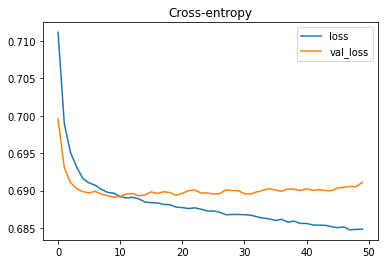

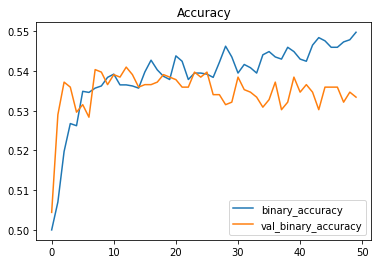

In [42]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    # callbacks=[early_stopping]
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")